In [1]:
import tensorflow as tf

from data_loader.kitti_road_data_loader import KittiRoadLoader
from models.unet_model import UNetModel
from trainers.road_trainer import RoadTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 
json_file = "configs/unet_KittiRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)

accuracy: dice_coeff
batch_size: 2
checkpoint_dir: ./experiments\unet_kittiroad\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/data_road
exp_name: unet_kittiroad
image_size:
- 320
- 480
- 3
learning_rate: 0.00023949513325777832
loss: bce_dice_loss
max_to_keep: 5
num_epochs: 10
num_iter_per_epoch: 100
summary_dir: ./experiments\unet_kittiroad\summary/



Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (2312, 320, 480, 3)
Size of masks collection :  (2312, 320, 480)


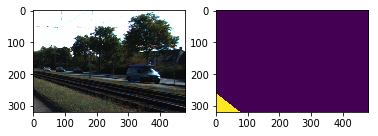

In [2]:
data = KittiRoadLoader(config)
img, mask = data.get_data_element("train_data",0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)
plt.show()

In [3]:
sess = tf.Session()
model = UNetModel(config)
model.build()
logger = Logger(sess,config)
trainer = RoadTrainer(sess,model,data,config,logger)
model.load(sess)
trainer.train()

Epoch  0


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:32<00:00,  1.51s/it]


-->Last epoch loss     :  1.0846721
-->Last epoch accuracy :  0.30281013
-->Last test loss      :  0.83917093
-->Last test accuracy  :  0.4236026
Saving model...
Model saved
[BEST LOST : 0.8391709327697754]
Epoch  1


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:34<00:00,  1.55s/it]


-->Last epoch loss     :  0.62546897
-->Last epoch accuracy :  0.5580744
-->Last test loss      :  0.49592042
-->Last test accuracy  :  0.6968585
Saving model...
Model saved
[BEST LOST : 0.49592041969299316]
Epoch  2


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:30<00:00,  1.50s/it]


-->Last epoch loss     :  0.44375542
-->Last epoch accuracy :  0.72823197
-->Last test loss      :  0.40373492
-->Last test accuracy  :  0.72867537
Saving model...
Model saved
[BEST LOST : 0.4037349224090576]
Epoch  3


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:30<00:00,  1.50s/it]


-->Last epoch loss     :  0.3493234
-->Last epoch accuracy :  0.7841268
-->Last test loss      :  0.38945496
-->Last test accuracy  :  0.77486247
Saving model...
Model saved
[BEST LOST : 0.3894549608230591]
Epoch  4


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:31<00:00,  1.51s/it]


-->Last epoch loss     :  0.3179532
-->Last epoch accuracy :  0.8025409
-->Last test loss      :  0.4250635
-->Last test accuracy  :  0.78523
Epoch  5


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:31<00:00,  1.53s/it]


-->Last epoch loss     :  0.3976737
-->Last epoch accuracy :  0.7341806
-->Last test loss      :  0.3801881
-->Last test accuracy  :  0.8031355
Saving model...
Model saved
[BEST LOST : 0.38018810749053955]
Epoch  6


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:31<00:00,  1.51s/it]


-->Last epoch loss     :  0.36424825
-->Last epoch accuracy :  0.7676813
-->Last test loss      :  0.34686482
-->Last test accuracy  :  0.80765784
Saving model...
Model saved
[BEST LOST : 0.34686481952667236]
Epoch  7


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:32<00:00,  1.50s/it]


-->Last epoch loss     :  0.35287416
-->Last epoch accuracy :  0.7660954
-->Last test loss      :  0.33108804
-->Last test accuracy  :  0.82227904
Saving model...
Model saved
[BEST LOST : 0.33108803629875183]
Epoch  8


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:31<00:00,  1.52s/it]


-->Last epoch loss     :  0.28625968
-->Last epoch accuracy :  0.81608224
-->Last test loss      :  0.3797523
-->Last test accuracy  :  0.8233063
Epoch  9


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:30<00:00,  1.50s/it]


-->Last epoch loss     :  0.35217068
-->Last epoch accuracy :  0.7648281
-->Last test loss      :  0.3225955
-->Last test accuracy  :  0.82112813
Saving model...
Model saved
[BEST LOST : 0.3225955069065094]


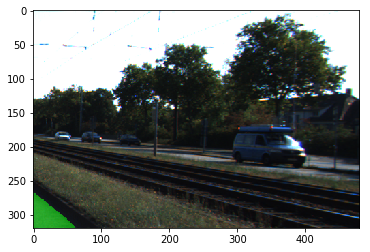

Accuracy :  0.821135


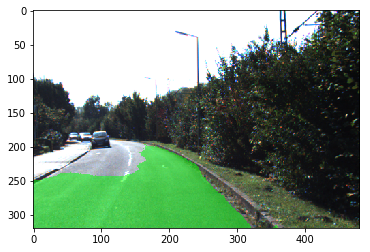

Accuracy :  0.8805557


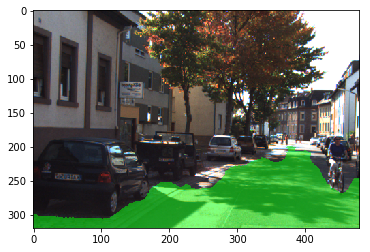

Accuracy :  0.8428961


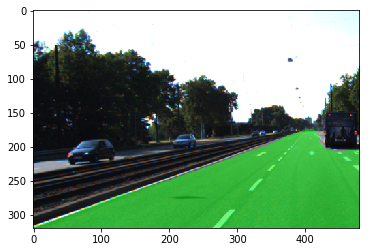

Accuracy :  0.9566416


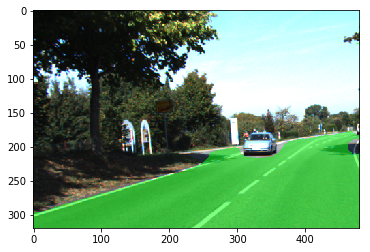

Accuracy :  0.9521695


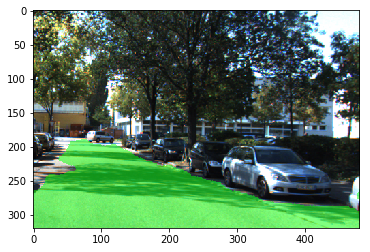

Accuracy :  0.8806692


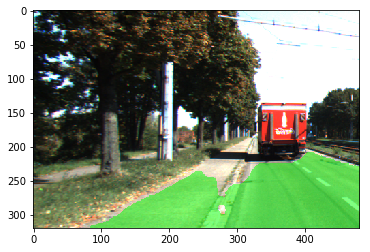

Accuracy :  0.7671739


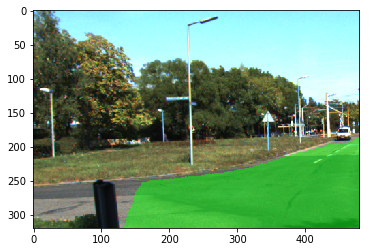

Accuracy :  0.88132185


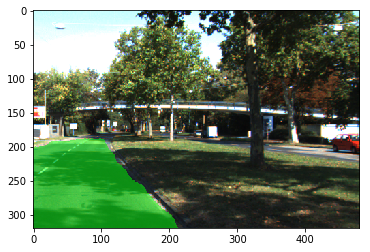

Accuracy :  0.94807893


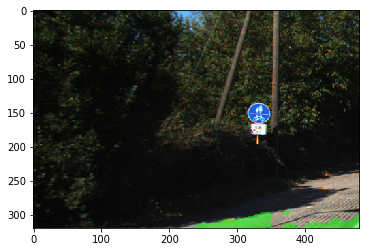

Accuracy :  0.04547452


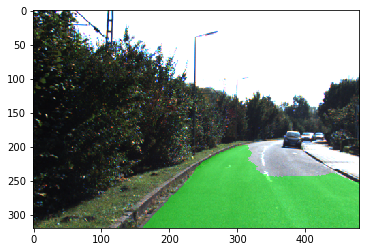

Accuracy :  0.8778921


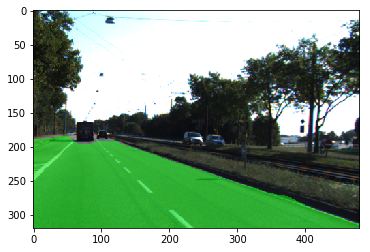

Accuracy :  0.9619109


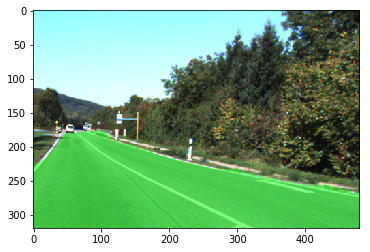

Accuracy :  0.96182674


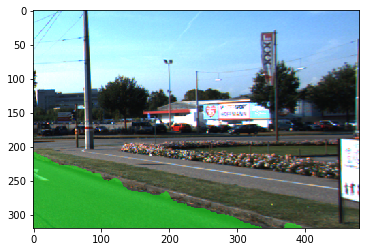

Accuracy :  0.91714406


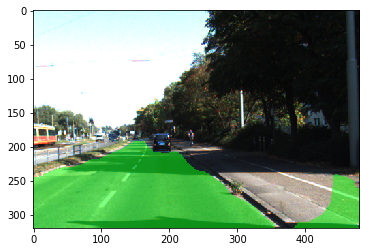

Accuracy :  0.9002014


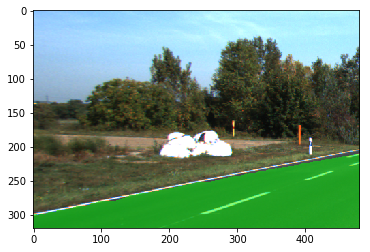

Accuracy :  0.9430594


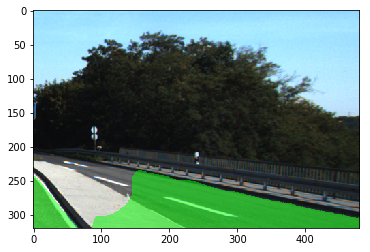

Accuracy :  0.21026962


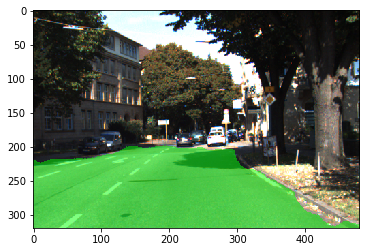

Accuracy :  0.9486394


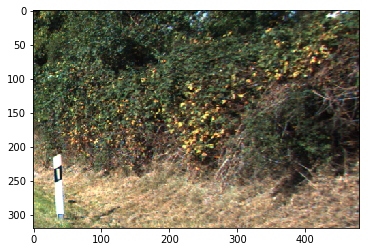

Accuracy :  0.114490286


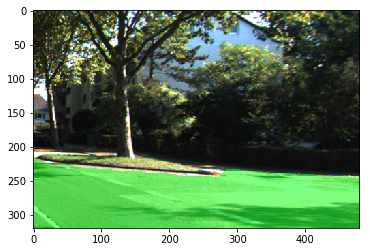

Accuracy :  0.9401501


In [4]:
test = [data.get_data_element("test_data",i) for i in range(20)]
for item in test :
    img = item[0]
    mask = item[1]
    model.predict(sess,img,mask)

In [5]:
sess.close()